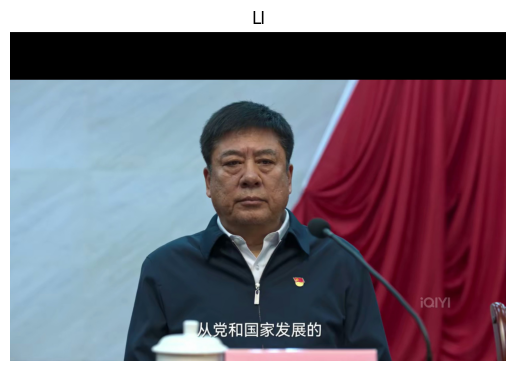

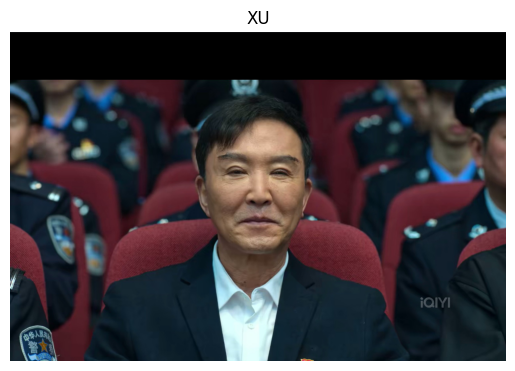

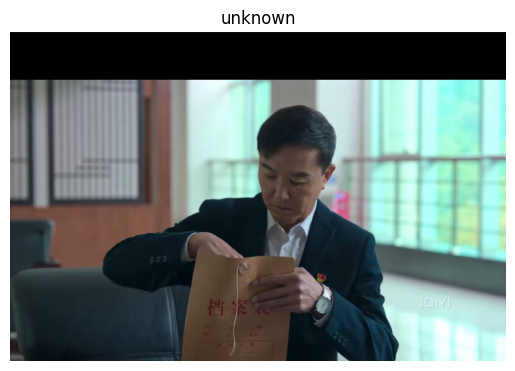

[0.51411681 0.5905408 ]




C:\Users\lx\AppData\Local\Temp\ipykernel_49540\1695128117.py:82: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)


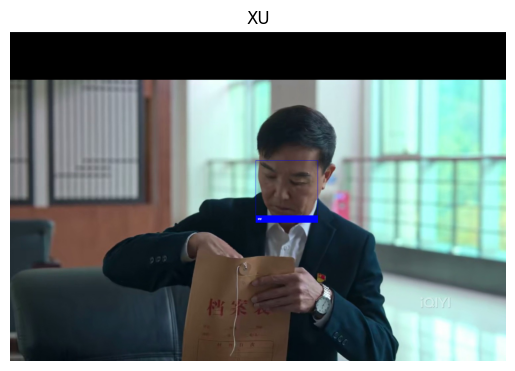

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import face_recognition
from PIL import Image, ImageDraw
import numpy as np

# 加载第一张示例图片并提取特征
obama_image = face_recognition.load_image_file("model_face/徐忠/1.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# 加载第二张示例图片并提取特征
biden_image = face_recognition.load_image_file("model_face/李牧/1.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# 创建已知人脸特征和其名字的数据
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "XU",
    "LI"
]

# 加载未知人脸图片
unknown_image = face_recognition.load_image_file("unknown_face/1.jpg")

# 人脸检测
face_locations = face_recognition.face_locations(unknown_image)
# 人脸特征提取
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# 查看输入图像
plt.imshow(biden_image)
plt.title('LI')
plt.axis('off')
plt.show()
plt.imshow(obama_image)
plt.title('XU')
plt.axis('off')
plt.show()
plt.imshow(unknown_image)
plt.title('unknown')
plt.axis('off')
plt.show()

# 绘图
pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

# 未知人脸图片中每张人脸处理
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # 判断和哪张人脸匹配
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # 结果匹配方式1
    # 有多张人脸匹配成功，只以匹配的第一张人脸为结果
    # if True in matches:
    #     first_match_index = matches.index(True)
    #     name = known_face_names[first_match_index]

    # 结果匹配方式2
    # 一种更好的结果匹配方式，使用距离新面孔最小的已知面孔为结果
    # 计算已知人脸和未知人脸特征向量的距离，距离越小表示两张人脸为同一个人的可能性越大
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(face_distances)
    print("\n")
    # 提取和未知人脸距离最小的已知人脸编号
    best_match_index = np.argmin(face_distances)
    if face_distances[best_match_index]>0.6:
        name = "Unknown"
    # 提取匹配的已知人脸名
    elif matches[best_match_index]:
        name = known_face_names[best_match_index]

    # 为人脸画边界框
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # 在人脸边界框下方绘制该人脸所属人的名字
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

del draw

# jupyter 绘图
# pil_image.show()
plt.imshow(pil_image)
plt.title(name)
plt.axis('off')
plt.show()

# 保存识别结果
# pil_image.save("image_with_boxes.jpg")